In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pickle

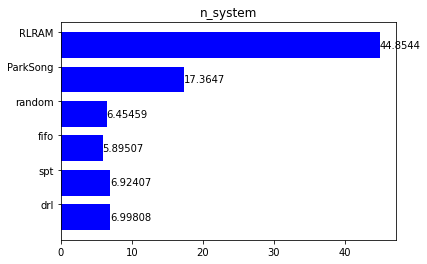

ppo 7.0 (0.19)
svfa 9.0 (0.26)
spt 6.9 (0.19)
fifo 5.9 (0.11)
random 6.5 (0.14)
Park and song 17.4 (1.16)
RLRAM 44.9 (0.45)


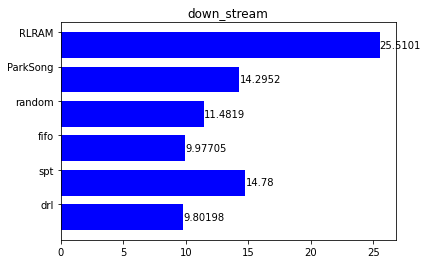

ppo 9.8 (0.26)
svfa 11.3 (0.37)
spt 14.8 (0.65)
fifo 10.0 (0.31)
random 11.5 (0.39)
Park and song 14.3 (0.65)
RLRAM 25.5 (0.96)


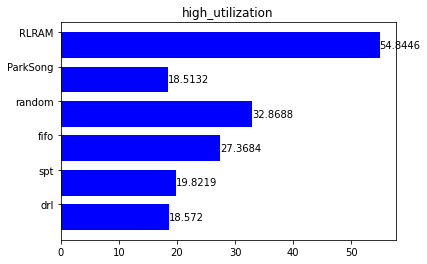

ppo 18.6 (0.87)
svfa 21.5 (1.39)
spt 19.8 (1.02)
fifo 27.4 (2.63)
random 32.9 (2.5)
Park and song 18.5 (0.98)
RLRAM 54.8 (2.72)


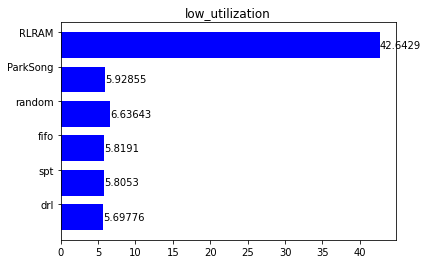

ppo 5.7 (0.1)
svfa 5.9 (0.11)
spt 5.8 (0.08)
fifo 5.8 (0.1)
random 6.6 (0.13)
Park and song 5.9 (0.1)
RLRAM 42.6 (0.14)


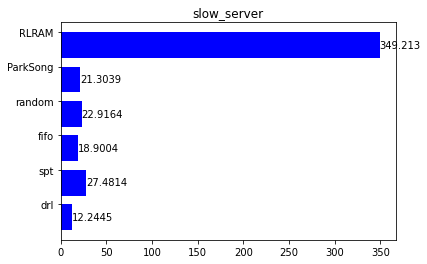

ppo 12.2 (0.52)
svfa 15.3 (0.71)
spt 27.5 (1.79)
fifo 18.9 (1.2)
random 22.9 (1.48)
Park and song 21.3 (1.67)
RLRAM 349.2 (13.4)


In [6]:
for model_name in ['n_system', 'down_stream', 'high_utilization', 'low_utilization', 'slow_server']:#, 'complete_parallel', 'complete', 'complete_reversed']:#, 'complete', 'complete_reversed', 'complete_parallel']:
    drl = pd.read_csv(f'results/PPOPlanner_{model_name}.txt')['mean_cycle_time']
    with open(f'results_svfa/{model_name}', 'rb') as f:
        svfa = pickle.load(f)
    spt = pd.read_csv(f'results/ShortestProcessingTime_{model_name}.txt')['mean_cycle_time']
    fifo = pd.read_csv(f'results/FIFO_{model_name}.txt')['mean_cycle_time']
    random = pd.read_csv(f'results/Random_{model_name}.txt')['mean_cycle_time']
    parkSong = pd.read_csv(f'results/ParkSong_{model_name}.txt')['mean_cycle_time']
    rlram = pd.read_csv(f'results/RLRAM_{model_name}.txt')['mean_cycle_time']
    
    labels = ['drl', 'spt', 'fifo', 'random', 'ParkSong', 'RLRAM']
    data = [drl.mean(), spt.mean(), fifo.mean(), random.mean(), parkSong.mean(), rlram.mean()]
    
    fig, ax = plt.subplots()    
    width = 0.75 # the width of the bars 
    ind = np.arange(len(data))  # the x locations for the groups
    bars = ax.barh(ind, data, width, color="blue")
    ax.set_yticks(ind+width/2)
    ax.set_yticklabels(labels, minor=False)
    plt.title(model_name)


    ax.bar_label(bars)  
    plt.show()

    print('ppo', f'{np.round(np.mean(drl),1)} ({np.round(1.96*(np.std(drl)/np.sqrt(len(drl))),2)})')
    print('svfa', f'{np.round(np.mean(svfa),1)} ({np.round(1.96*(np.std(svfa)/np.sqrt(len(svfa))),2)})')
    print('spt', f'{np.round(np.mean(spt),1)} ({np.round(1.96*(np.std(spt)/np.sqrt(len(spt))),2)})')
    print('fifo', f'{np.round(np.mean(fifo),1)} ({np.round(1.96*(np.std(fifo)/np.sqrt(len(fifo))),2)})')
    print('random', f'{np.round(np.mean(random),1)} ({np.round(1.96*(np.std(random)/np.sqrt(len(random))),2)})')
    print('Park and song', f'{np.round(np.mean(parkSong),1)} ({np.round(1.96*(np.std(parkSong)/np.sqrt(len(parkSong))),2)})') 
    print('RLRAM', f'{np.round(np.mean(rlram),1)} ({np.round(1.96*(np.std(rlram)/np.sqrt(len(rlram))),2)})') 
    #plt.show()






In [4]:
for model_name in ['n_system', 'down_stream', 'high_utilization', 'low_utilization', 'slow_server', 'parallel', 'complete', 'complete_reversed', 'complete_parallel']:
    drl = pd.read_csv(f'results/PPOPlanner_{model_name}.txt')
    drl_penalty = pd.read_csv(f'results/PPOPlanner_{model_name}_penalty.txt')
    spt = pd.read_csv(f'results/ShortestProcessingTime_{model_name}.txt')
    fifo = pd.read_csv(f'results/FIFO_{model_name}.txt')
    random = pd.read_csv(f'results/Random_{model_name}.txt')
    
    labels = ['drl', 'drl_postpone', 'spt', 'fifo', 'random']
    data = [drl['mean_cycle_time'].mean(), drl_penalty['mean_cycle_time'].mean(), spt['mean_cycle_time'].mean(), fifo['mean_cycle_time'].mean(), random['mean_cycle_time'].mean()]
    
    fig, ax = plt.subplots()    
    width = 0.75 # the width of the bars 
    ind = np.arange(len(data))  # the x locations for the groups
    bars = ax.barh(ind, data, width, color="blue")
    ax.set_yticks(ind+width/2)
    ax.set_yticklabels(labels, minor=False)
    plt.title(model_name)


    ax.bar_label(bars)      
    #plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'results/PPOPlanner_n_system_penalty.txt'

In [ ]:
from scipy import stats
#for model_name in ['n_system', 'down_stream', 'high_utilization', 'low_utilization', 'slow_server', 'parallel', 'complete', 'complete_reversed', 'complete_parallel']:

model_name = 'complete_parallel'
drl = pd.read_csv(f'results/PPOPlanner_{model_name}_penalty.txt')['mean_cycle_time']
with open(f'results_svfa/{model_name}', 'rb') as f:
    svfa = pickle.load(f)
spt = pd.read_csv(f'results/ShortestProcessingTime_{model_name}.txt')['mean_cycle_time']
fifo = pd.read_csv(f'results/FIFO_{model_name}.txt')['mean_cycle_time']
random = pd.read_csv(f'results/Random_{model_name}.txt')['mean_cycle_time']

stats.ttest_ind(drl, fifo)  

Ttest_indResult(statistic=-1.4233150044173675, pvalue=0.15621864272106434)